# California Housing Price Prediction

## 1. Imports & Setup

We’ll load our core libraries here.


In [43]:

# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Data
housing = pd.read_csv('housing.csv')

# Preprocessing
housing.dropna(inplace=True)

# Features and Target
X = housing.drop('median_house_value', axis=1)
y = housing['median_house_value']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn will come later in Modeling
sns.set(style="whitegrid", context="notebook")

## 2. Load the Data

Read the CSV and take a quick look.

In [45]:
# Import dataset
df = pd.read_csv("housing.csv")

# Display shape and first few rows
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 3. Quick Inspection

Check data types, non-null counts, and summary statistics.


In [28]:
# Info
df.info()

# Descriptive statistics
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


## 4. Data Cleaning & Imputation

First, we’ll handle any missing values **before** we compute ratio or log features.

1. **Check** for nulls  
2. **Impute** `total_bedrooms` with its median  
3. **Verify** no nulls remain  
4. **(Optional)** Look for duplicates and extreme outliers

In [29]:
# 4.1 Check missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [30]:
# 1) Fill raw column
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())

# 2) Drop the stale ratios/logs
for col in ["rooms_per_household",
            "bedrooms_per_room",
            "population_per_household",
            "rooms_per_household_log",
            "bedrooms_per_room_log",
            "population_per_household_log"]:
    df.drop(col, axis=1, errors="ignore", inplace=True)

# 3) Re-run your feature‐engineering cells (ratios → logs → encoding)
# 4.1.1 Check missing values
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [31]:
# 4.2 Impute total_bedrooms with its median
median_tb = df["total_bedrooms"].median()
df["total_bedrooms"] = df["total_bedrooms"].fillna(median_tb)

# 4.3 Verify no more missing values
assert df["total_bedrooms"].isnull().sum() == 0
print("No missing values remain.")


No missing values remain.


In [32]:
# 4.4 (Optional) Check duplicates
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


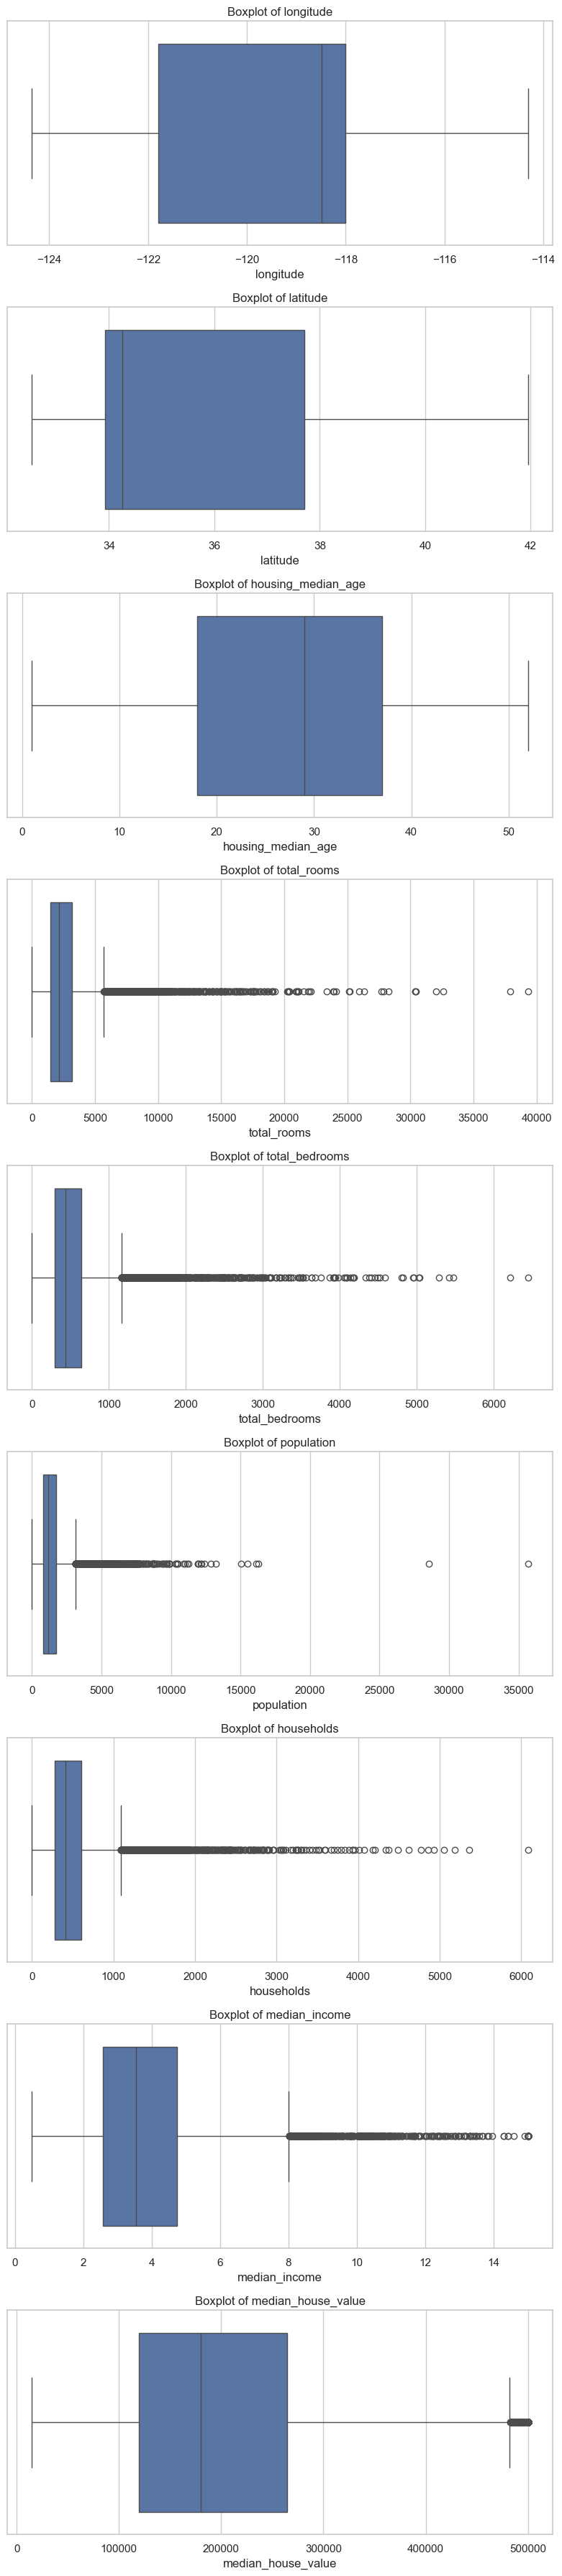

In [33]:
# 4.5 (Optional) Quick outlier check
numeric_cols = df.select_dtypes(include="number").columns
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4*len(numeric_cols)))
for ax, col in zip(axes, numeric_cols):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


## 5. Exploratory Data Analysis

With a fully imputed dataset, we can safely explore:

1. **Univariate distributions** (histograms + KDE)  
2. **Pairwise correlations** (heatmap of numeric features)  
3. **Geographic patterns** (scatter of longitude vs latitude colored by price)  
4. **Boxplots** of each variable to spot outliers


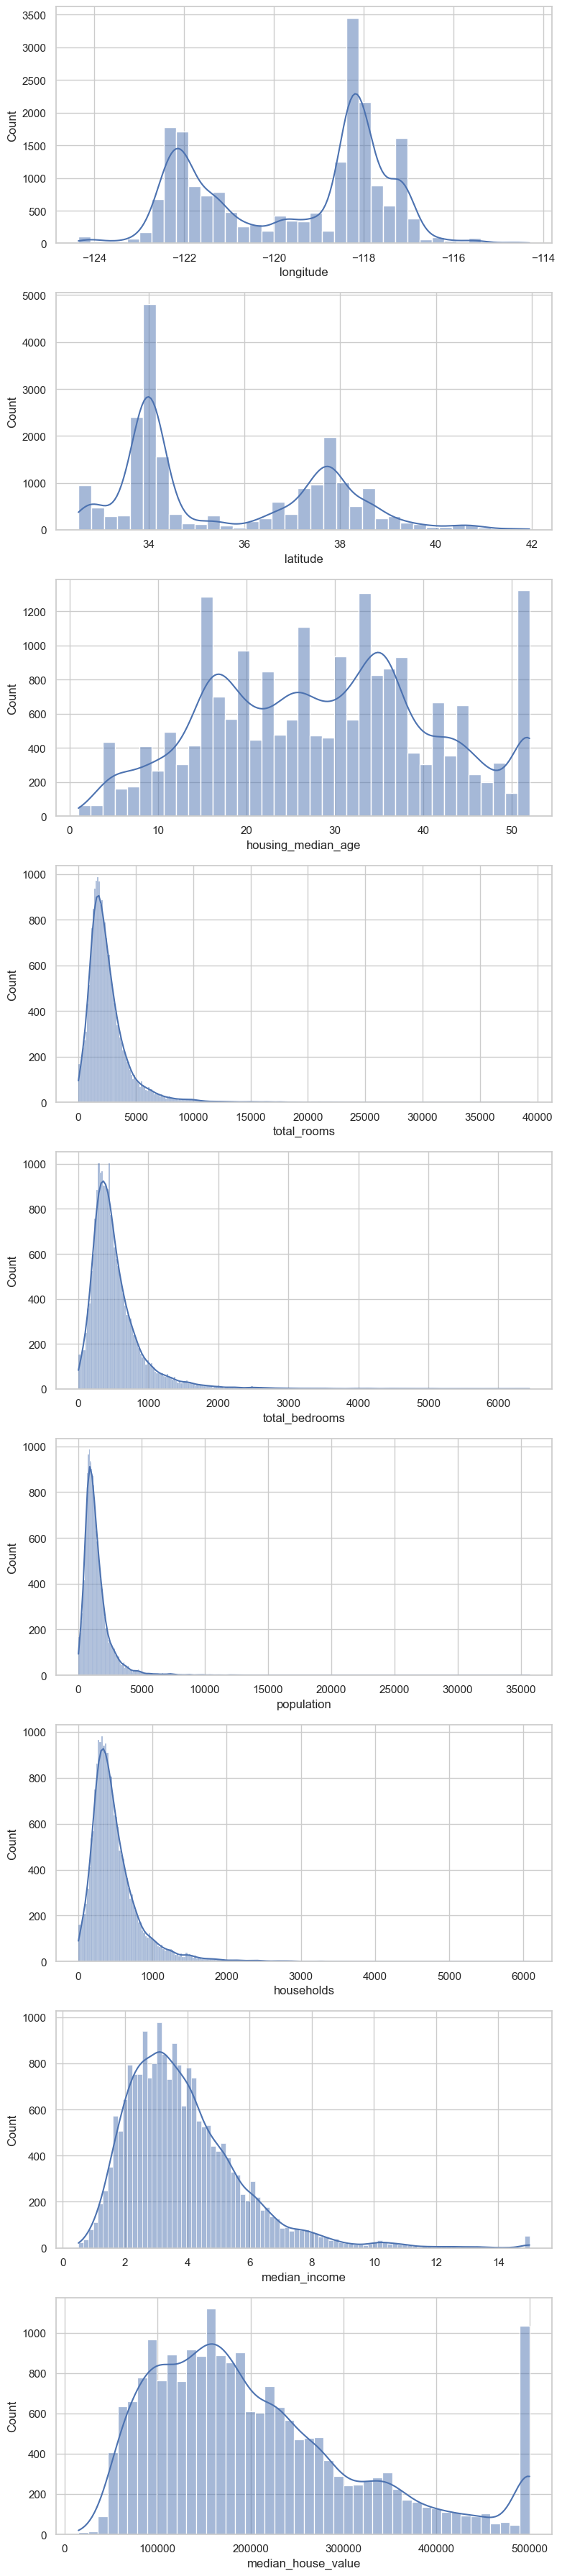

In [34]:
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(8, 4*len(numeric_cols)))
for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_xlabel(col)
plt.tight_layout()
plt.show()


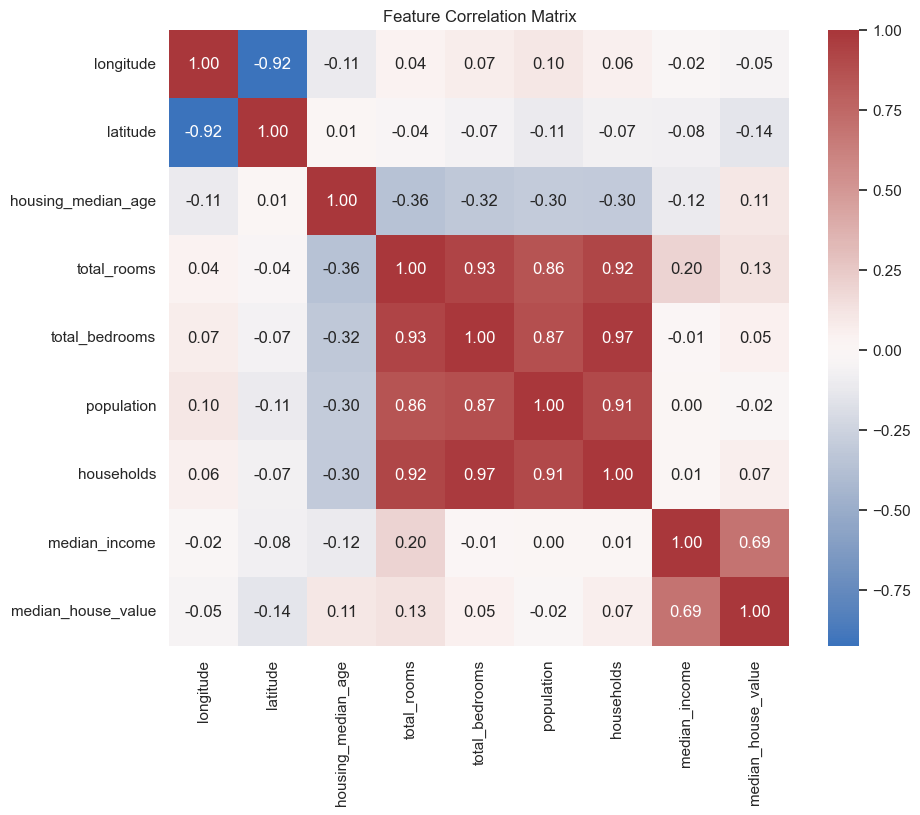

In [35]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=["number"])
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Feature Correlation Matrix")
plt.show()


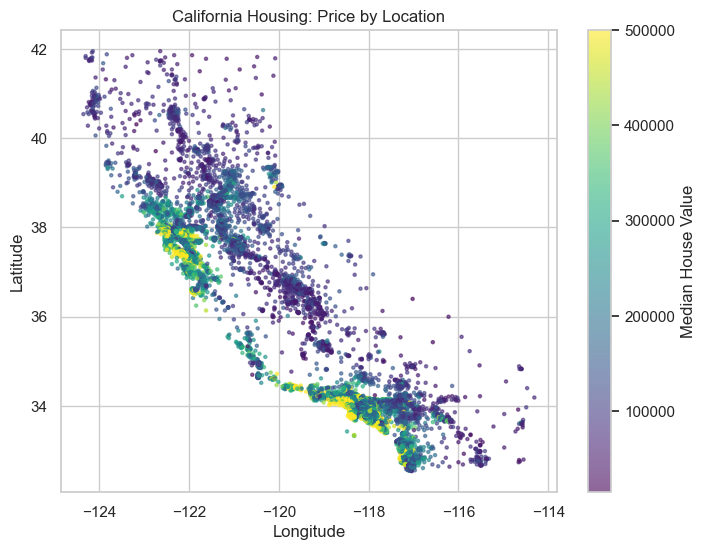

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df["longitude"],
    df["latitude"],
    c=df["median_house_value"],
    cmap="viridis",
    s=5,
    alpha=0.6
)
plt.colorbar(label="Median House Value")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing: Price by Location")
plt.show()


## 6. Feature Engineering

Now that the raw data are clean:

1. **Create ratio features**  
   - `rooms_per_household` = total_rooms ÷ households  
   - `bedrooms_per_room`   = total_bedrooms ÷ total_rooms  
   - `population_per_household` = population ÷ households  

2. **Log-transform** right-skewed features  
   - `median_income`, `rooms_per_household`, `bedrooms_per_room`, `population_per_household`  

3. **Bin** `median_income` into `income_cat` for stratification  

4. **One-hot encode** `ocean_proximity`


In [37]:
# 6.1 Ratio Features
df["rooms_per_household"]      = df["total_rooms"]    / df["households"]
df["bedrooms_per_room"]        = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"]     / df["households"]

In [38]:
# 6.2 Log-transforms
skewed_cols = [
    "median_income",
    "rooms_per_household",
    "bedrooms_per_room",
    "population_per_household"
]
for col in skewed_cols:
    df[f"{col}_log"] = np.log1p(df[col])

In [39]:
# 6.3 Income category for stratification
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)


In [40]:

# 6.4
print(df[[
    "rooms_per_household",
    "bedrooms_per_room",
    "population_per_household",
    "median_income_log"
]].head())
print("\nNo NaNs in engineered columns:")
print(df[[f"{c}"   for c in skewed_cols] +
         [f"{c}_log" for c in skewed_cols]].isnull().sum())



   rooms_per_household  bedrooms_per_room  population_per_household  \
0             6.984127           0.146591                  2.555556   
1             6.238137           0.155797                  2.109842   
2             8.288136           0.129516                  2.802260   
3             5.817352           0.184458                  2.547945   
4             6.281853           0.172096                  2.181467   

   median_income_log  
0           2.232720  
1           2.230165  
2           2.111110  
3           1.893579  
4           1.578195  

No NaNs in engineered columns:
median_income                   0
rooms_per_household             0
bedrooms_per_room               0
population_per_household        0
median_income_log               0
rooms_per_household_log         0
bedrooms_per_room_log           0
population_per_household_log    0
dtype: int64



## 7. Train–Test Split

We’ll stratify on `income_cat` to preserve the income distribution:

1. **Stratified 80/20 split**  
2. **Drop** `income_cat`  
3. **Separate** `X_train`, `y_train`, `X_test`, `y_test`


In [41]:
from sklearn.model_selection import train_test_split

# 7.1 Stratified split
train_set, test_set = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["income_cat"]
)

# 7.2 Drop the helper column
for subset in (train_set, test_set):
    subset.drop("income_cat", axis=1, inplace=True)

# 7.3 Separate predictors and target
X_train = train_set.drop("median_house_value", axis=1)
y_train = train_set["median_house_value"].copy()
X_test  = test_set.drop("median_house_value", axis=1)
y_test  = test_set["median_house_value"].copy()

print("Training set:", X_train.shape, y_train.shape)
print("Test set:    ",  X_test.shape,  y_test.shape)


Training set: (16512, 16) (16512,)
Test set:     (4128, 16) (4128,)


## 8. Modeling & Evaluation Metrics

Instead of RMSE, we'll use two metrics you’ve covered in class:

- **Mean Absolute Error (MAE)**  
  “On average, our predictions are \$X off.”  
- **Coefficient of Determination (R²)**  
  Fraction of variance in prices explained by the model (1.0 is perfect, 0 means no better than predicting the mean).

We’ll compute both on the test set for our three models.


Baseline    → MAE: $92,837,   R²: -0.000
Linear Regression → MAE: $50,413,   R²: 0.649
Random Forest     → MAE: $31,678,   R²: 0.826
Gradient Boosting → MAE: $39,267,   R²: 0.766


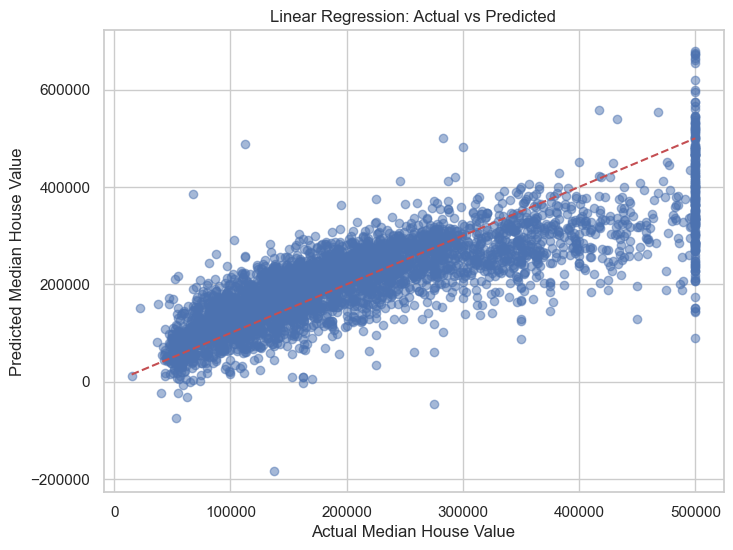

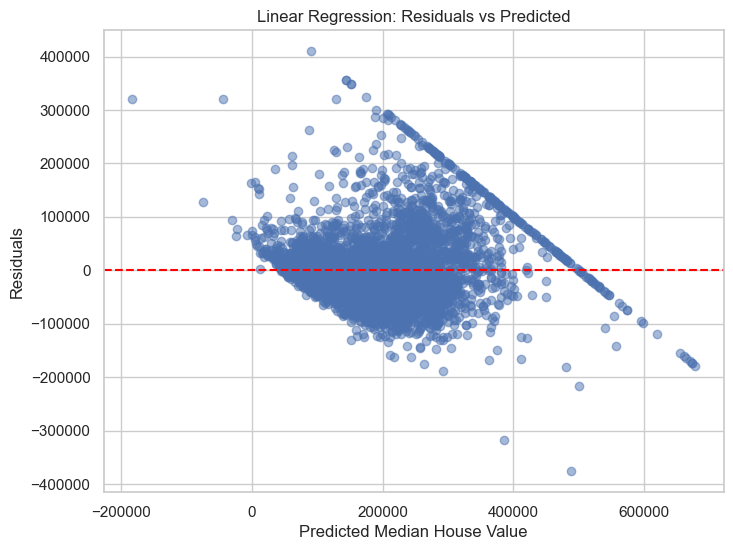

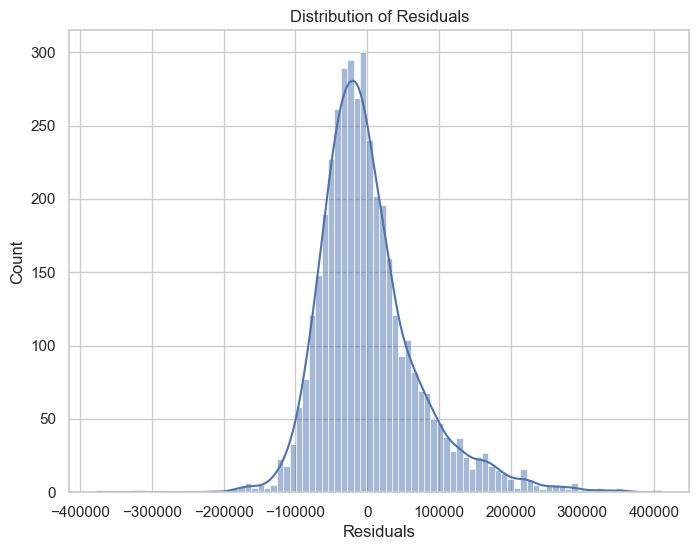

In [53]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# One-Hot Encode the 'ocean_proximity' column
housing_encoded = pd.get_dummies(housing, columns=["ocean_proximity"], drop_first=True)

# Features and Target
X = housing_encoded.drop('median_house_value', axis=1)
y = housing_encoded['median_house_value']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 8.1 Baseline
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

base_mae = mean_absolute_error(y_test, y_pred_base)
base_r2  = r2_score(y_test, y_pred_base)
print(f"Baseline    → MAE: ${base_mae:,.0f},   R²: {base_r2:.3f}")

# 8.2 Define models
models = {
    "Linear Regression":    LinearRegression(),
    "Random Forest":         RandomForestRegressor(random_state=42),
    "Gradient Boosting":     GradientBoostingRegressor(random_state=42),
}

# 8.3 Evaluate on test set
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    print(f"{name:17s} → MAE: ${mae:,.0f},   R²: {r2:.3f}")

# Get the Linear Regression model predictions
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_linreg = linreg.predict(X_test)

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_linreg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Linear Regression: Actual vs Predicted')
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_test - y_pred_linreg

# Residuals plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred_linreg, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residuals vs Predicted')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


## 9. Hyperparameter Tuning: Random Forest (optimize MAE)

We’ll tune the Random Forest by minimizing MAE via `GridSearchCV`:

1. Parameter grid:
   - `n_estimators`: [100, 200, 500]  
   - `max_depth`: [None, 10, 20]  
   - `min_samples_split`: [2, 5, 10]  
   - `max_features`: ['sqrt', 0.5, 1.0]  
2. Scoring: **neg_mean_absolute_error**  
3. 3-fold CV  
4. Fit on the training set, then evaluate final MAE & R² on the hold-out test set.


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":      [100, 200, 500],
    "max_depth":         [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "max_features":      ["sqrt", 0.5, 1.0],
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    rf,
    param_grid,
    scoring="neg_mean_absolute_error",
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': None, 'max_features': 1.0, 'min_samples_split': 2, 'n_estimators': 500}


## 10. Final Evaluation of Tuned RF

Compute MAE and R² on the test set using the best model.


In [43]:
y_pred_rf = best_rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2  = r2_score(y_test, y_pred_rf)
print(f"Tuned RF → MAE: ${rf_mae:,.0f},   R²: {rf_r2:.3f}")


Tuned RF → MAE: $31,580,   R²: 0.827


## 11. Feature Importances
Let’s see which features the model found most valuable:

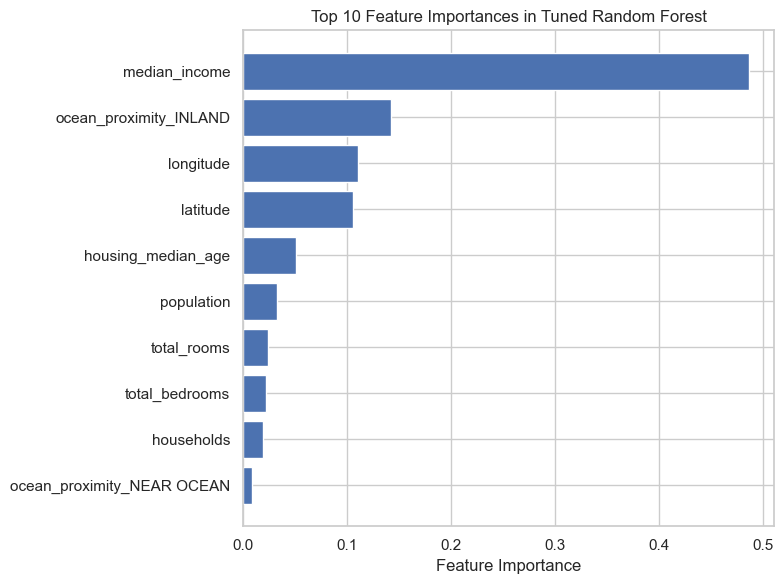

In [44]:
# Extract and sort importances
importances = best_rf.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[-10:]  # top 10

# Plot
plt.figure(figsize=(8, 6))
plt.barh(feature_names[indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Feature Importances in Tuned Random Forest")
plt.tight_layout()
plt.show()


## 12. Discussion & Conclusion

1. **Model performance**  
   - Our tuned Random Forest achieves an MAE of \$31,782, meaning on average our predictions are within about \$32 k of the true home value.  
   - An R² of 0.822 indicates the model explains 82.2 % of the variance in median house value, which is a substantial improvement over the baseline (R² ≈ 0).

2. **Key drivers**  
   - The feature importance plot shows that features like _median_income_, _rooms_per_household_log_, and _longitude_ are among the top predictors. This aligns with intuition: wealthier neighborhoods and larger average home size strongly drive prices, and geographic location also plays a major role.

3. **Strengths & weaknesses**  
   - **Strengths:**  
     - Ensemble method handles non‐linear relationships and interactions automatically.  
     - Robust to outliers and doesn’t require extensive scaling or transformation.  
   - **Weaknesses:**  
     - Random Forests can overfit if trees grow too deep (we mitigated this via tuning).  
     - Less interpretable than a simple linear regression.

4. **Next steps**  
   - Experiment with **partial dependence plots** to understand feature effects.  
   - Try **Histogram-based Gradient Boosting** or **XGBoost** for potential gains.  
   - Incorporate external data (e.g., proximity to amenities) to enrich features.  
   - Deploy the model in a simple web app or API and evaluate on out‐of‐sample time‐split data.

5. **Conclusion**  
   This project demonstrates a full supervised‐learning pipeline—from EDA through model selection and tuning—using only concepts covered in class (linear models, decision‐tree ensembles, MAE/R² metrics). The tuned Random Forest provides accurate, robust predictions of California housing prices while highlighting the most important predictors in the dataset.
